## World Population  Analysis


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('world_population.csv')
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [4]:
df.drop(['CCA3','Capital'],axis=1,inplace=True)
 # axis=1 removes column and inplace represents permenant change in dataset
df.head()

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [5]:
df.shape



(234, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   Country/Territory            234 non-null    object 
 2   Continent                    234 non-null    object 
 3   2022 Population              234 non-null    int64  
 4   2020 Population              234 non-null    int64  
 5   2015 Population              234 non-null    int64  
 6   2010 Population              234 non-null    int64  
 7   2000 Population              234 non-null    int64  
 8   1990 Population              234 non-null    int64  
 9   1980 Population              234 non-null    int64  
 10  1970 Population              234 non-null    int64  
 11  Area (km²)                   234 non-null    int64  
 12  Density (per km²)            234 non-null    float64
 13  Growth Rate         

In [7]:
df.duplicated().sum()

0

## Descriptive Statistics
Understanding the basic statistics of the dataset can provide a good starting point for further analysis.

In [8]:
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


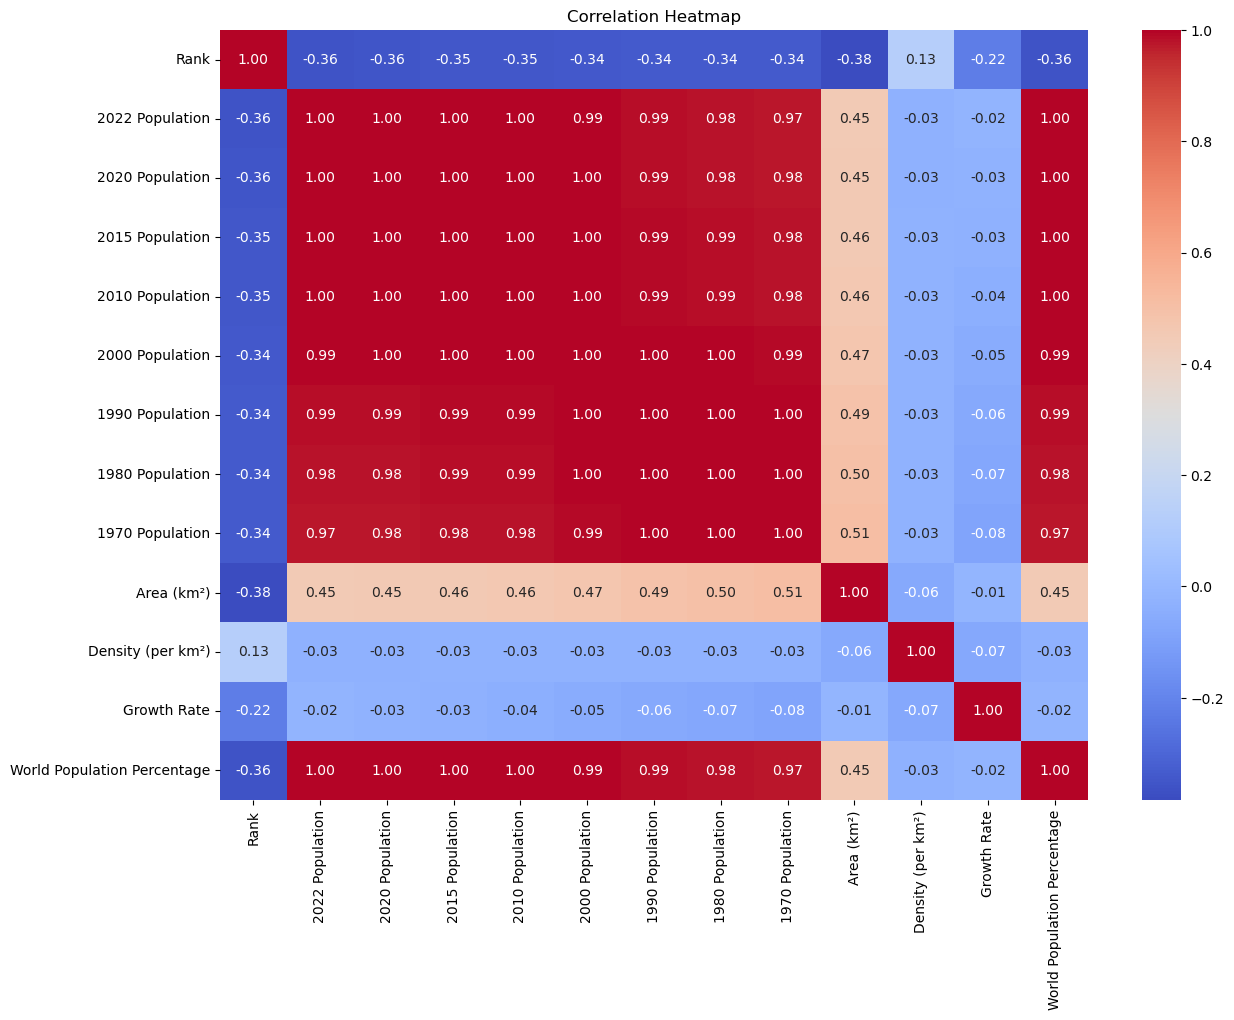

In [16]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [34]:
df.isnull().sum()

Rank                           0
Country/Territory              0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [35]:
# order our data by 2022 population in descending order and set Rank as index
df = df.sort_values(by = '2022 Population', ascending = False)
df

,Rank,Country/Territory,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
41,1,China,Asia,1425887337,1424929781,1393715448,1348191368,1264099069,1153704252,982372466,822534450,9706961,146.8933,1.0000,17.88
92,2,India,Asia,1417173173,1396387127,1322866505,1240613620,1059633675,870452165,696828385,557501301,3287590,431.0675,1.0068,17.77
221,3,United States,North America,338289857,335942003,324607776,311182845,282398554,248083732,223140018,200328340,9372610,36.0935,1.0038,4.24
93,4,Indonesia,Asia,275501339,271857970,259091970,244016173,214072421,182159874,148177096,115228394,1904569,144.6529,1.0064,3.45
156,5,Pakistan,Asia,235824862,227196741,210969298,194454498,154369924,115414069,80624057,59290872,881912,267.4018,1.0191,2.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,230,Montserrat,North America,4390,4500,5059,4938,5138,10805,11452,11402,102,43.0392,0.9939,0.00
64,231,Falkland Islands,South America,3780,3747,3408,3187,3080,2332,2240,2274,12173,0.3105,1.0043,0.00
150,232,Niue,Oceania,1934,1942,1847,1812,2074,2533,3637,5185,260,7.4385,0.9985,0.00
209,233,Tokelau,Oceania,1871,1827,1454,1367,1666,1669,1647,1714,12,155.9167,1.0119,0.00


In [36]:
country_count=df['Continent'].value_counts()
fig=px.bar(y=country_count.values,
       x=country_count.index,
       color=country_count.index,
       template='plotly_dark',
       color_discrete_sequence=px.colors.sequential.PuBuGn,
       text=country_count.values,
      title='NO.OF COUNTRIES BY CONTINENT')
fig.update_layout(
xaxis_title='CONTINENTS',
yaxis_title='NO.of countries')

fig.show()

In [37]:
# BAR PLOT FOR DIFFERENT CONTINENTS USING PLOTPLY
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    Continents_population=df.groupby(by='Continent')[feature].sum().sort_values(ascending=False)
    fig=px.bar(x=Continents_population.index,
           y=Continents_population.values,
           color=Continents_population,
           text=Continents_population.values,
           color_discrete_sequence=px.colors.sequential.PuBu,
           title=feature+'POPULATION BY CONTINENTS',
          template='plotly_dark')
    fig.update_layout(xaxis_title='Countries',yaxis_title='Population_count')
    fig.show()

In [38]:
# PIE CHART OF POPULATION RATION AND COUNT BY CONTINENT IN DIFFERNT YEARS

In [39]:
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    Continents_population=df.groupby(by='Continent')[feature].sum().sort_values(ascending=False)
    fig = px.pie(values=Continents_population.values, 
             names=Continents_population.index, 
             color_discrete_sequence=px.colors.sequential.PuBu,
             title= feature+' Ratio And Count By Continent',template='plotly_dark')
    fig.update_traces(textinfo='label+percent+value', textfont_size=15,
                  marker=dict(line=dict(color='#100000', width=0.2)))
    fig.show()


In [43]:
# MAP VISUALISATION OF POPULATION BY YEARS
features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    fig = px.choropleth(df,
                    locations='Country/Territory',
                     locationmode='country names',
                     color=feature,
                     # we indicate the year we are interested in
                    hover_name='Country/Territory',
                    template='plotly_dark',
                    title = feature)
    fig.show()

In [ ]:
# TOP 8 POPULATED COUNTRIES
country_population = df.groupby(by = 'Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(8)
country_population

Country/Territory
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Nigeria           218541212
Brazil            215313498
Bangladesh        171186372
Name: 2022 Population, dtype: int64

In [45]:
# BARPLOT OF TOP 8 POPULATED COUNTRIES

features=['2022 Population','2015 Population','2010 Population','2000 Population','1990 Population','1980 Population','1970 Population']
for feature in features:
    country_population = df.groupby(by = 'Country/Territory')[feature].sum().sort_values(ascending=False).head(8)   
    fig=px.bar(x=country_population.index,
       y=country_population.values,
       color=country_population.index,
       text=country_population.values,
      template='plotly_dark',
          title=feature + ' per Country')
    fig.update_layout(xaxis_title='Country',
                 yaxis_title='Population')
    fig.show()

## ABOVE WE CAN SEE POPULATION OF TOP 8 COUNTRIES IN THEIR RESPECTIVE YEARS

In [11]:
# population Growth
df['area_per_person']=df['Area (km²)'] / df['2022 Population']
area_per_person_incountry=df.groupby(by='Country/Territory')['area_per_person'].sum()
area_per_person_incountry

Country/Territory
Afghanistan          0.015858
Albania              0.010114
Algeria              0.053042
American Samoa       0.004495
Andorra              0.005863
                       ...   
Wallis and Futuna    0.012271
Western Sahara       0.461817
Yemen                0.015668
Zambia               0.037597
Zimbabwe             0.023943
Name: area_per_person, Length: 234, dtype: float64

In [12]:
area_per_person_incountry.sort_values(ascending=True).head(5)

Country/Territory
Macau        0.000043
Monaco       0.000055
Singapore    0.000119
Hong Kong    0.000147
Gibraltar    0.000184
Name: area_per_person, dtype: float64

In [13]:
# LAND AVAILABLE PER PERSON IN COUNTRY
fig=px.bar(x=area_per_person_incountry.sort_values(ascending=True).head(5).index,
            y=area_per_person_incountry.sort_values(ascending=True).head(5).values,
            color=area_per_person_incountry.sort_values(ascending=True).head(5).index,
            text=area_per_person_incountry.sort_values(ascending=True).head(5).values,
            title='Lowest land available countries per person',
            template='plotly_dark')
fig.update_layout(xaxis_title='COUNTRIES',
                 yaxis_title='LAND AVAILABLE PER PERSON')
fig.show()

In [15]:
area_per_person_incountry.sort_values(ascending=False).head(5)

Country/Territory
Greenland           38.360890
Falkland Islands     3.220370
Western Sahara       0.461817
Mongolia             0.460254
Namibia              0.321625
Name: area_per_person, dtype: float64

In [16]:
fig=px.bar(x=area_per_person_incountry.sort_values(ascending=False).head(5).index,
            y=area_per_person_incountry.sort_values(ascending=False).head(5).values,
            color=area_per_person_incountry.sort_values(ascending=False).head(5).index,
            text=area_per_person_incountry.sort_values(ascending=False).head(5).values,
            title='MOST LAND AVAILABLE COUNTRIES PER PERSON',
            template='plotly_dark')
fig.update_layout(xaxis_title='COUNTRIES',
                 yaxis_title='LAND AVAILABLE PER PERSON')
fig.show()

### GREELAND IS THE MOST LAND AVAILABLE COUNTRY PER PERSON
### ONLY 0.000043 KM2 LAND AVAILABLE IN SINGLE PERSON IN MACAU ACCORDING TO THEIR POPULATION
### RUSSIA IS THE TOP COUNTRY ACQUARING MOST LAND IN THE WORLD and VATICAN CITY IS THE LOWEST
###
###
### *

## LAND AVAILABLE PER COUNTRY

In [17]:
most_land=df.groupby(by='Country/Territory')['Area (km²)'].sum().sort_values(ascending=False).head(5)
most_land

Country/Territory
Russia           17098242
Canada            9984670
China             9706961
United States     9372610
Brazil            8515767
Name: Area (km²), dtype: int64

In [28]:
X = df[['1970 Population', '1980 Population', '1990 Population', '2000 Population', '2010 Population', '2015 Population', '2020 Population','Area (km²)','Density (per km²)','Growth Rate']]
y = df['2022 Population']

In [34]:
df_scaled = StandardScaler.fit_transform(df)

TypeError: TransformerMixin.fit_transform() missing 1 required positional argument: 'X'

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScale

df_scaled = StandardScaler.fit_transform(df)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)
X_scaled_test=scaler.transform(X_test)
print("Model training using linear regression")
regressor=LinearRegression()
reg=regressor.fit(X_scaled,y_train)
print("REG SCORE")
print(reg.score(X_scaled_test,y_test))
y_pred1=reg.predict(X_scaled_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred1))
print("R2 SCORE")
print(r2_score(y_test,y_pred1))


Model training using linear regression
REG SCORE
0.9998926600986353
MEAN SQUARED ERROR
412364521013.6939
R2 SCORE
0.9998926600986353


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Standardize training data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)

# Train the linear regression model
regressor = LinearRegression()
reg = regressor.fit(X_scaled_train, y_train)

# Print model score
print("REG SCORE")
print(reg.score(scaler.transform(X_test), y_test))  # Use scaled test data for evaluation

# Make predictions on scaled test data
y_pred_scaled = reg.predict(scaler.transform(X_test))

# Assuming X_train has 10 features
y_pred_scaled_reshaped = y_pred_scaled.reshape(-1, 10)  # Reshape to match training data features
y_pred_unscaled = scaler.inverse_transform(y_pred_scaled_reshaped)

# Print performance metrics (optional)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test, y_pred_unscaled))
print("R2 SCORE")
print(r2_score(y_test, y_pred_unscaled))

# Use y_pred_unscaled for your unscaled predictions


REG SCORE
0.9998926600986353


ValueError: cannot reshape array of size 71 into shape (10)

In [12]:
from sklearn.tree import DecisionTreeRegressor
print("Model training using DECISION TREE REGRESSOR")
clf = DecisionTreeRegressor()
clf.fit(X_scaled,y_train)
print("Model Training using decision tree")
print(clf.score(X_test,y_test))
y_pred2=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred2))
print("R2 SCORE")
print(r2_score(y_test,y_pred2))

Model training using DECISION TREE REGRESSOR
Model Training using decision tree
-505.35505872092534
MEAN SQUARED ERROR
1.945249237214883e+18
R2 SCORE
-505.35505872092534


In [13]:
from sklearn.ensemble import RandomForestRegressor
print("Model training using RANDOM FOREST REGRESSOR")
clf=RandomForestRegressor()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_pred3=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred3))
print("R2 SCORE")
print(r2_score(y_test,y_pred3))


Model training using RANDOM FOREST REGRESSOR
0.8990527883051509
MEAN SQUARED ERROR
387805914380330.56
R2 SCORE
0.8990527883051509


In [12]:
from sklearn.svm import SVR
print("Model training using SVR")
clf=SVR()
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))
y_pred4=clf.predict(X_test)
print("MEAN SQUARED ERROR")
print(mean_squared_error(y_test,y_pred4))
print("R2 SCORE")
print(r2_score(y_test,y_pred4))

Model training using SVR
-0.22110885392029722
MEAN SQUARED ERROR
4691097730207461.0
R2 SCORE
-0.22110885392029722


In [13]:
y_pred1=pd.Series(y_pred1,index=y_test.index,name='y_pred')
df_new=pd.concat([X_test,y_test.rename('y_test'),y_pred1],axis=1)
df_new.reset_index(drop=True,inplace=True)
df_new

,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population,2015 Population,2020 Population,Area (km²),Density (per km²),Growth Rate,y_test,y_pred
0,46484,66825,113931,164351,228453,257026,290969,83534,3.6459,1.0239,304557,3.590586e+05
1,35791728,45737753,55228410,63066603,68270489,70294397,71475664,513120,139.7276,1.0013,71697030,7.132011e+07
2,18169,21346,23132,26823,31608,33570,34007,61,551.8033,0.9975,33660,4.121060e+04
3,2534377,3135123,3556539,3168523,2946293,2878595,2805608,29743,93.4831,0.9962,2780469,2.757466e+06
4,326428,333786,374271,432543,392181,383515,370391,1128,325.8041,0.9965,367507,3.646586e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
66,1023481,1407672,1798997,1998630,2022747,2118521,2254100,30355,75.9620,1.0107,2305825,2.325275e+06
67,50523586,53713830,56412897,58665453,62444567,63809769,64480053,551695,117.1419,1.0015,64626628,6.443766e+07
68,8861895,11865246,15446982,19665502,25574719,28870939,32180401,238533,140.3406,1.0196,33475870,3.350736e+07
69,133343,187921,261928,333926,396053,421437,441725,5765,77.8841,1.0081,449002,4.729401e+05
